<a href="https://colab.research.google.com/github/iyoob-utexas/ds4e/blob/main/notebooks/n2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

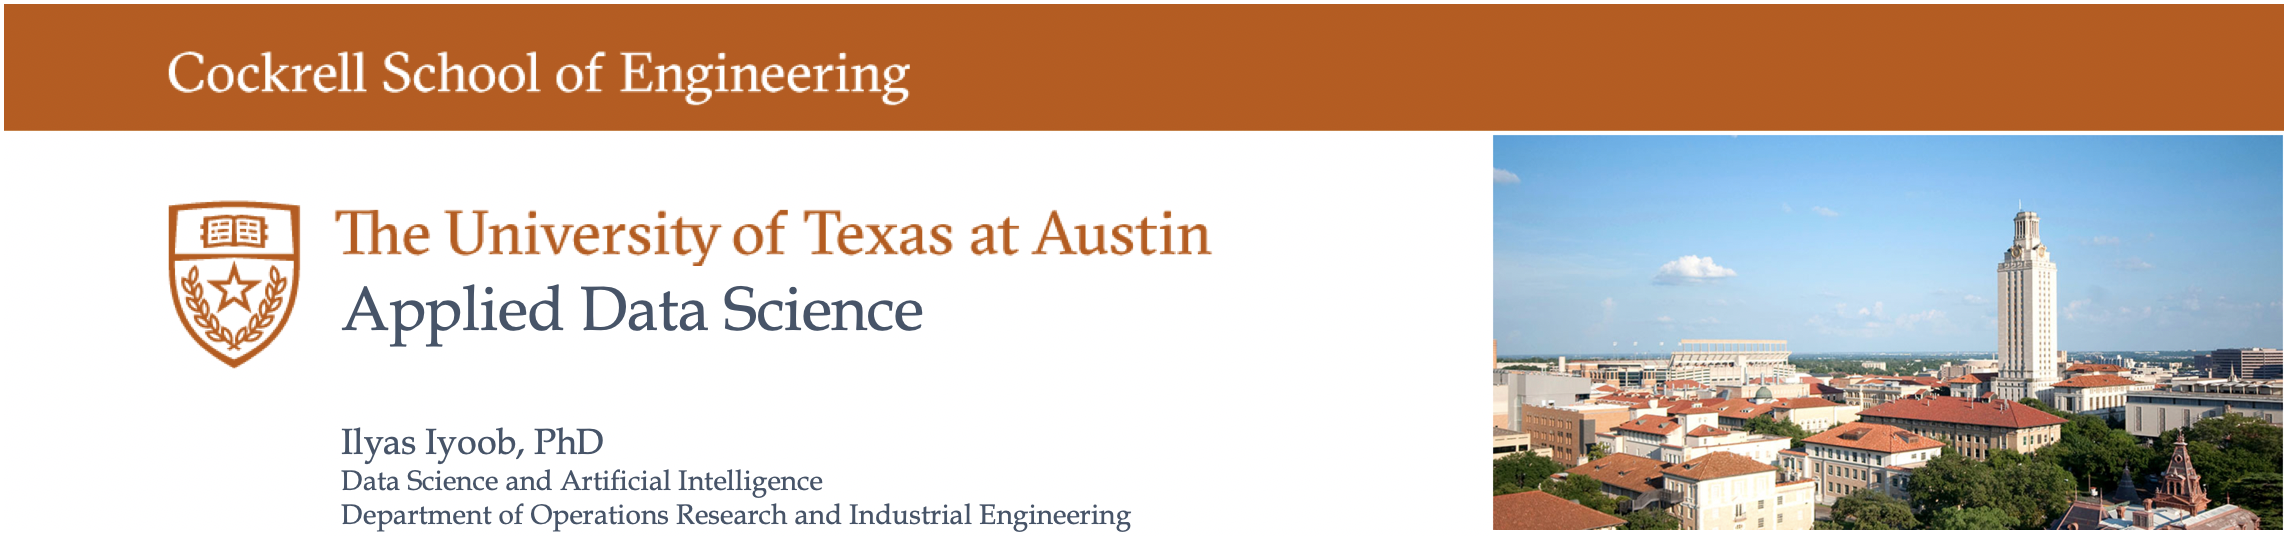

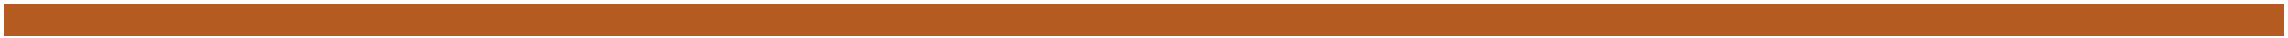

## <font color='#475468'> Melbourne House Prices:</font> 
### <font color='#475468'> Can you predict sale prices of houses in Melbourne?</font> 

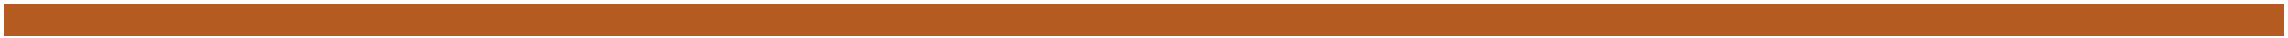

## Initialize

In [1]:
import pandas as pd
import numpy as np

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfMlb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/housing/house_prices.csv')

In [ ]:
dfMlb.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Select Data

### Select a prediction "Target"
The column we want to predict is called the prediction **target**. By convention, the prediction target is called y. In our case, we want to predict Price.

In [ ]:
y = dfMlb.loc[:,['Price']]

### Choose "Features"
The columns that are input into our model (and later used to make predictions) are called **features**. In our case, those would be the columns used to determine the home price.

In [ ]:
X = dfMlb.loc[:,['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']]

In [ ]:
# View top few rows
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
0,2,1.0,202.0,-37.7996,144.9984
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
3,3,2.0,94.0,-37.7969,144.9969
4,4,1.0,120.0,-37.8072,144.9941


In [ ]:
# Describe columns using basic stats
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.534242,558.416127,-37.809203,144.995216
std,0.955748,0.691712,3990.669241,0.079260,0.103916
min,1.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,1.000000,177.000000,-37.856822,144.929600
50%,3.000000,1.000000,440.000000,-37.802355,145.000100
75%,3.000000,2.000000,651.000000,-37.756400,145.058305
max,10.000000,8.000000,433014.000000,-37.408530,145.526350


Note: Describing data is a great way to determine if there are any anomalous data points...

As a sidenote, functions such as df.describe() that include a parantheses are **methods** whereas functions such as df.columns that don't include parantheses are **attributes**.

## Build Model

WHITEBOARD >>

Let's start with a **Decision Tree** model.  This is the most basic and logical type of model that we use in our day to day lives.

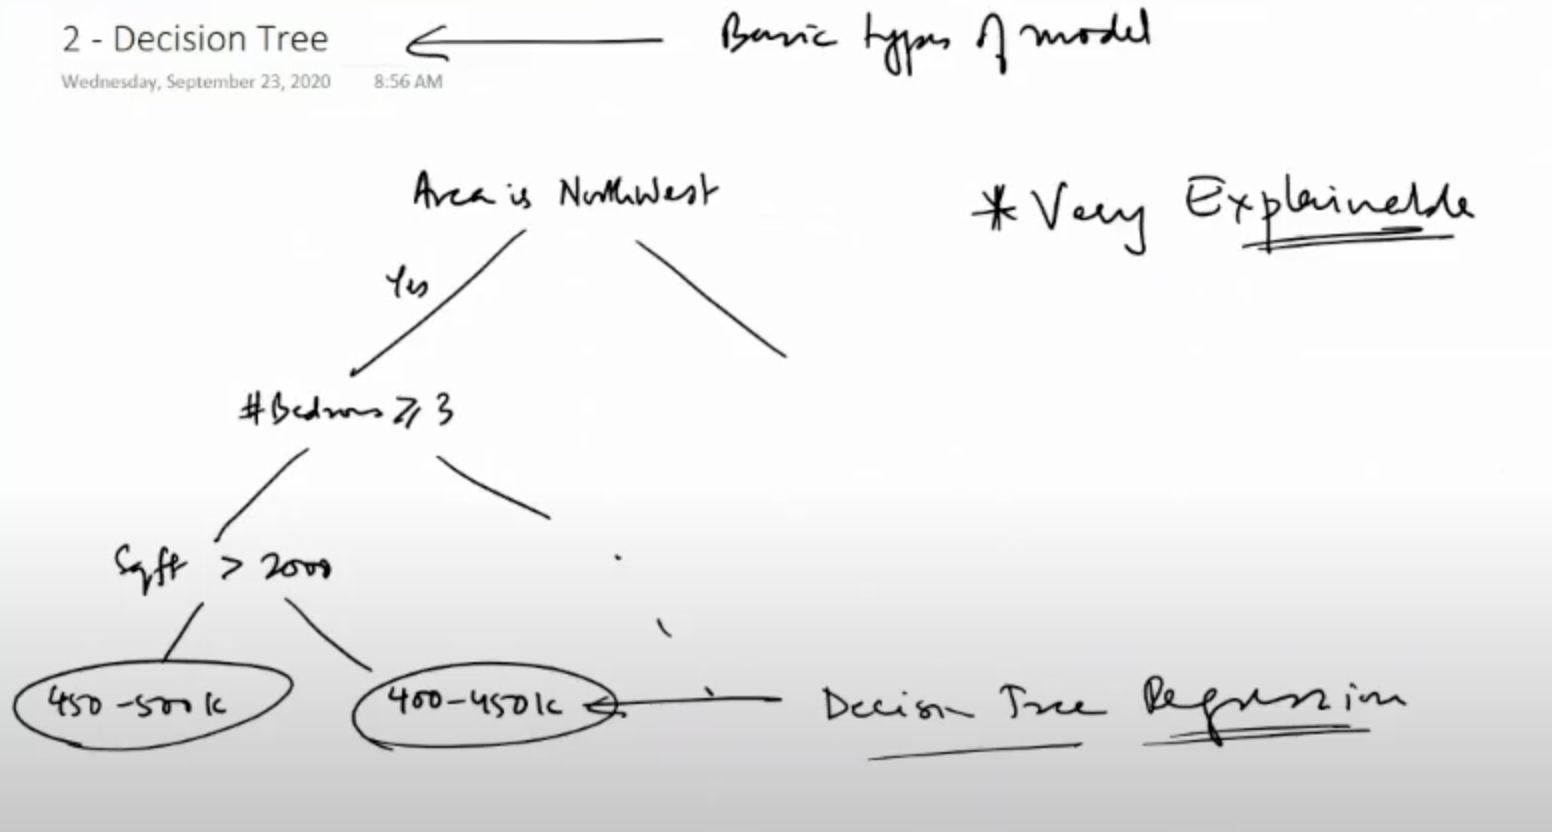

The algorithm finds the best way to split the data points...

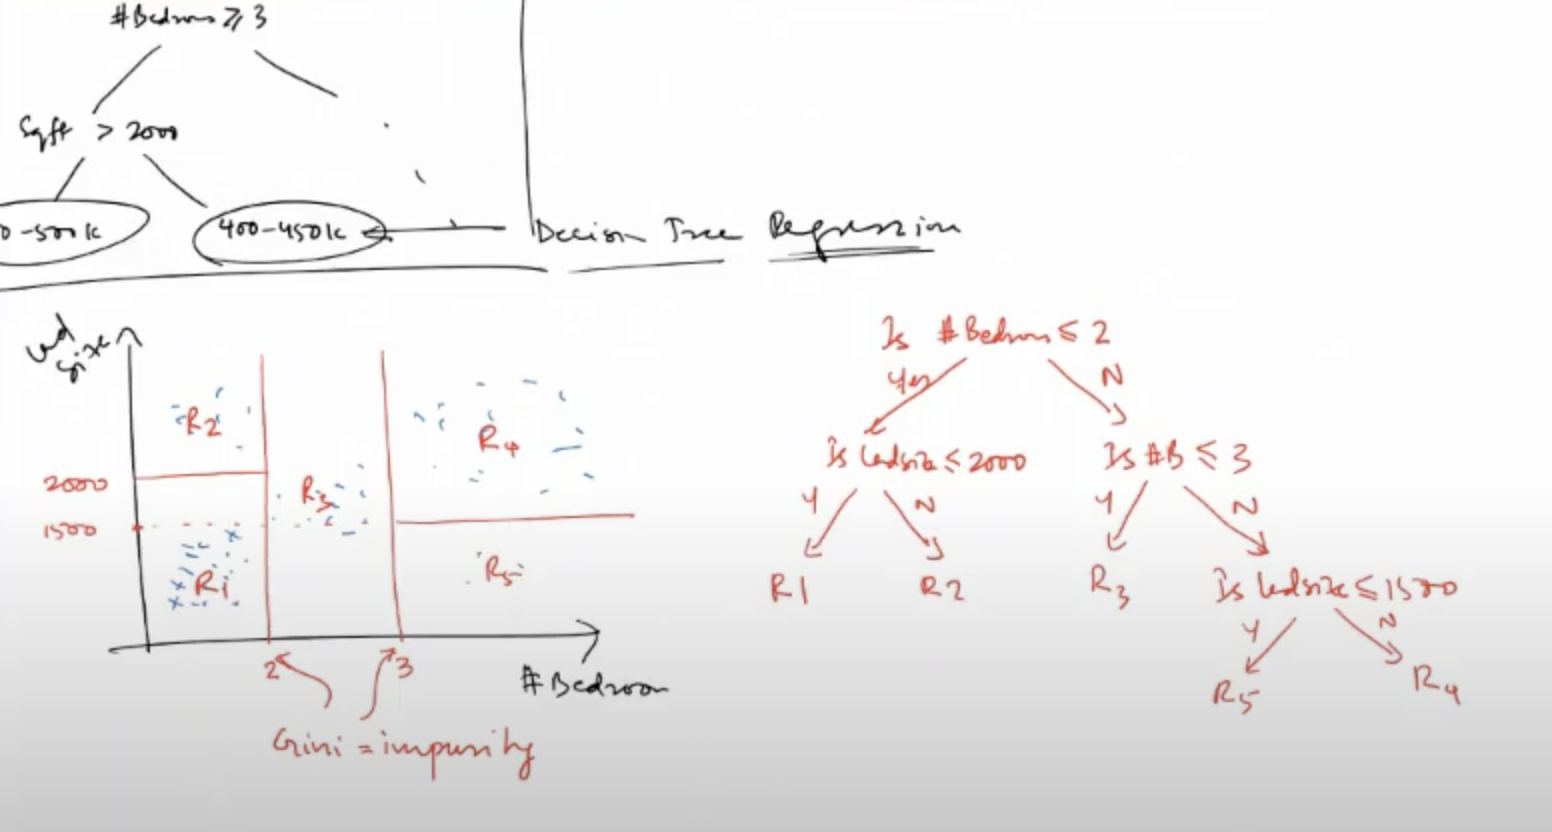

<< WHITEBOARD

The steps to building and using a model are:

* **Define:** Define the appropriate model to use. Depending on the model choice, other parameters are specified too.
* **Fit:** Fit the model to the data by capturing patterns.
* **Predict:** Predict other data points using the fitted model.
* **Evaluate:** Evaluate the model's prediction.

We will use the sklearn library to create our models. 

#### Define

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

# Fix the seed to the random number generator to ensure same results each run.
mdlDtrMlb = DecisionTreeRegressor(random_state=1)

#### Fit

In [ ]:
mdlDtrMlb.fit(X,y)

DecisionTreeRegressor(random_state=1)

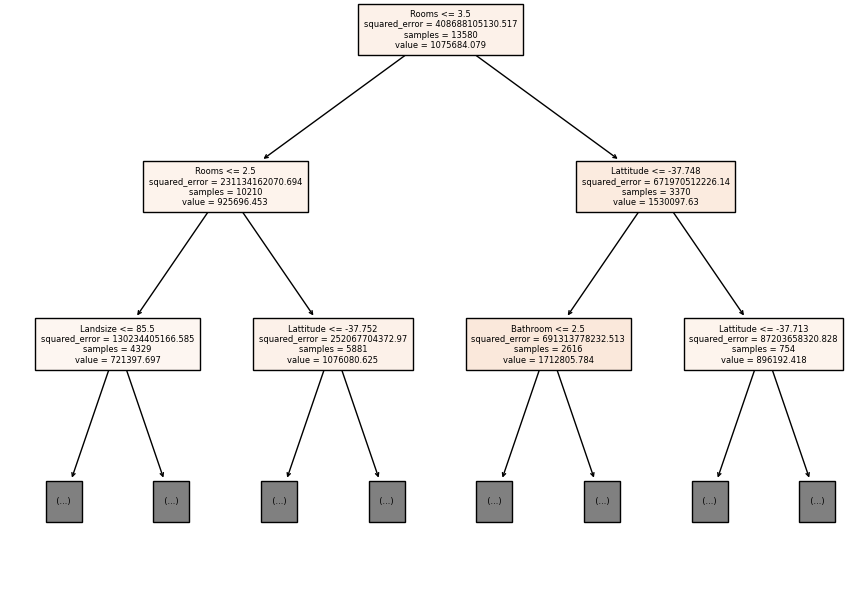

In [ ]:
# Show model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrMlb, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

We now have a fitted model that we can use to make predictions.

In practice, we'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the "Training Data" to see how the predict function works.

#### Predict

In [ ]:
print('First few houses:')
print(X.head())
print('Price predictions:')
print(mdlDtrMlb.predict(X.head()))

First few houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
0      2       1.0     202.0   -37.7996    144.9984
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
3      3       2.0      94.0   -37.7969    144.9969
4      4       1.0     120.0   -37.8072    144.9941
Price predictions:
[1480000. 1035000. 1465000.  850000. 1600000.]


In [ ]:
y.head()

,Price
0,1480000.0
1,1035000.0
2,1465000.0
3,850000.0
4,1600000.0


#### Evaluate
There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE).

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = mdlDtrMlb.predict(X)
print('MAE:')
print(mean_absolute_error(y,y_pred))

MAE:
1125.1804614629357


Hold on... We just "Trained" and "Tested" the model on the same data.  This is called an in-sample score, but it doesn't reflect the fact that we want to make predictions on future data based on past data.  What we really want is an out-of-sample score.  For this, we will split the data into a **Training set** and a **Test set** so that we can build the model on the Training data set and validate the model on the Test data set.

WHITEBOARD >>

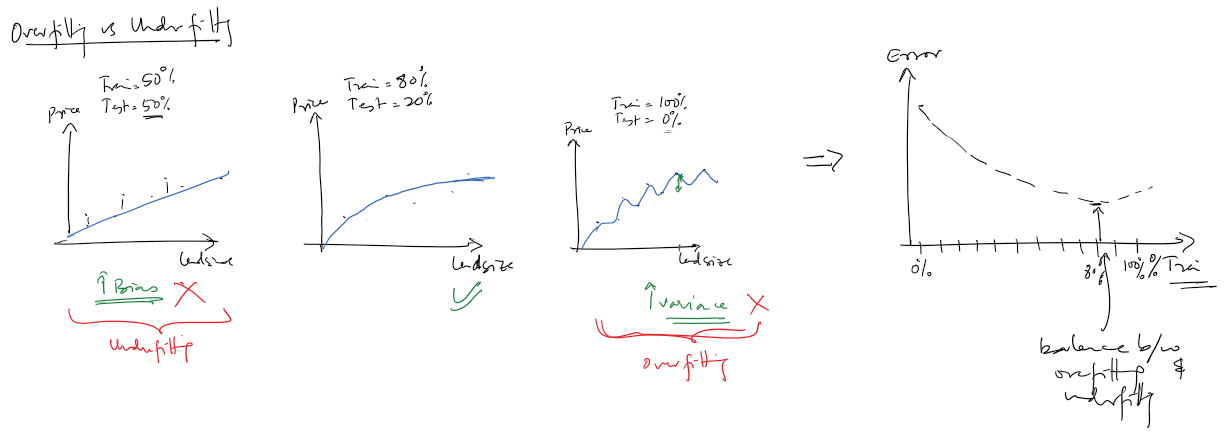

What we see is a phenomenon called **Overfitting**, where a model matches the training data almost perfectly, but does poorly in validation and other new data.  On the other hand, when a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called **Underfitting**. 

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the error curve.

**So Why Train Test Split?**
Forcing the model to use all the data - assumes that it will be judged only on data points inside of it - which isn't true.  So, we have to let the model keep out some data points to check itself and improve for unseen data...

<< WHITEBOARD

In [ ]:
from sklearn.model_selection import train_test_split

# Split features and target into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1)

In [ ]:
# Rebuild model
mdlDtrMlbSpl = DecisionTreeRegressor(random_state=1)
mdlDtrMlbSpl.fit(X_train, y_train)

# Predict test data
y_test_pred = mdlDtrMlbSpl.predict(X_test)

# Evaluate test data actual vs prediction
print('MAE (after train-test-split):')
print(mean_absolute_error(y_test,y_test_pred))

MAE (after train-test-split):
238406.56130338734


Wow...  So, the in-sample model was only \$1100 off from the mean on average whereas the out-of-sample model was a whopping \$238K off from the mean (which translates to 22% off a mean price of $1.1M). To improve this, we would need to tweak the model or try a different model type.

utexas_ds_orie_divider_gray.png

## Improve Decision Tree Model
There are many settings in a Decision Tree model that we can tweak.  The most important one is the tree's depth.  Let's see what happens when we tweak the max_leaf_nodes in the Decision Tree model.

In [ ]:
# Function to build and return MAE for a given number of max_leaf_nodes
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):
    mdlDtrMlbDpt = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)
    mdlDtrMlbDpt.fit(X_trn,y_trn)
    y_tst_prd = mdlDtrMlbDpt.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(mae)

In [ ]:
# Iterate over a list of max_leaf_nodes to determine MAE across all
for i in [5, 50, 500, 50000]:
    mae = get_mae(i, X_train, X_test, y_train, y_test)
    print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  359783.60063327465
Max leaf nodes:  50 	 Mean Absolute Error:  265943.7314522826
Max leaf nodes:  500 	 Mean Absolute Error:  221352.9439085965
Max leaf nodes:  50000 	 Mean Absolute Error:  239426.94072164947


The best depth of the tree is at 500 max leaf nodes.

Turns out that when we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).  This is another example of *Overfitting*, where a model matches the training data almost perfectly, but does poorly in validation and other new data.

On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.  At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is another example of *Underfitting*.

So, as mentioned earlier, we again want to find the sweet spot between underfitting and overfitting.

WHITEBOARD >>

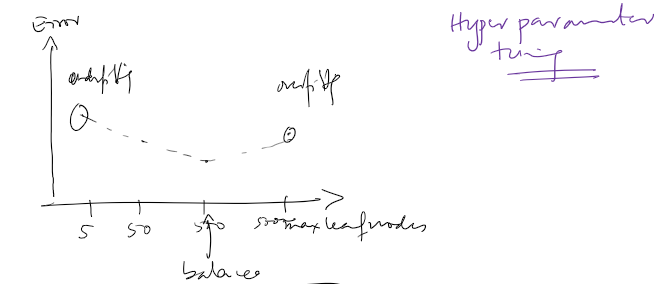

<< WHITEBOARD

Thus tweaking the settings of the Decision Tree model has resulted in reducing the MAE from 22% of mean price to 20%.  Next, let us try a different model to further improve performance. Even today's most sophisticated modeling techniques face this tension between underfitting and overfitting. But, many models have clever ideas that can lead to better performance. 

## Build Ensemble Random Forest Model
While the Decision Tree is simple, it is also not the most accurate because only a single tree is created and all future data points have to traverse the same tree.  What if we could generate more trees?

WHITEBOARD >>

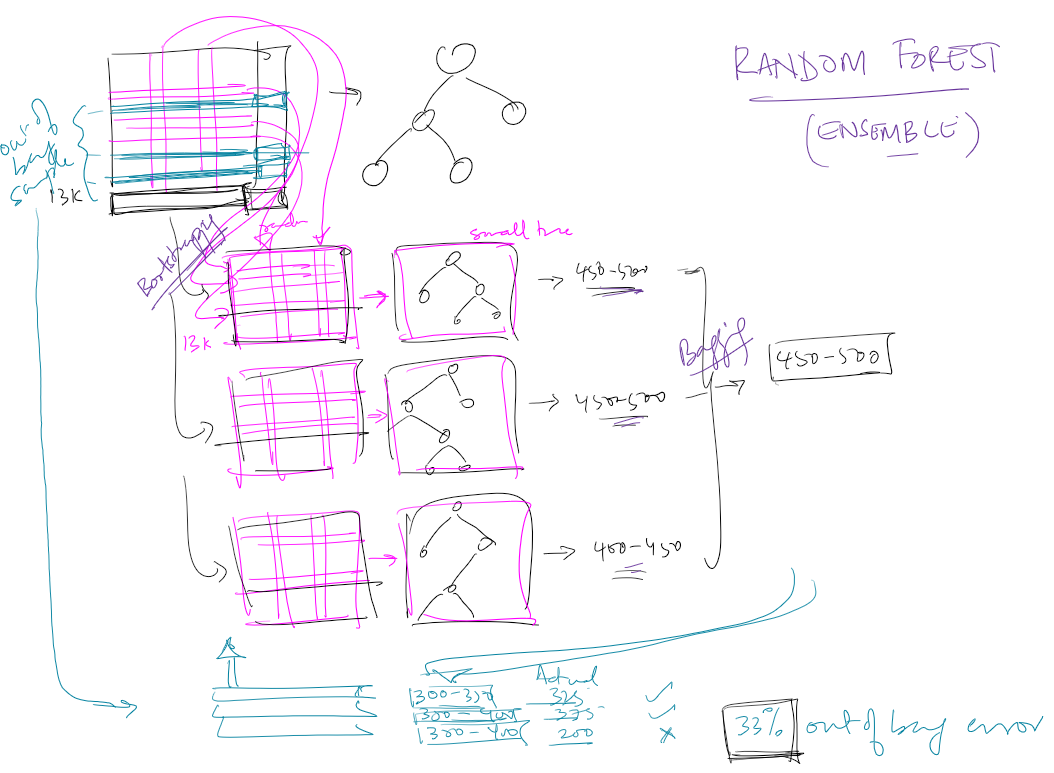

<< WHITEBOARD

**So Why Random Forest?**
Doesn't it make sense to talk to many realtors who have different experiences... and see if they all come to the same conclusion? Instead of speaking to one know-it-all?  This is the motivation for generating a random set of trees and bagging the results...

Therefore, the **Random Forest** model uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define random forest model
mdlRfsMlb = RandomForestRegressor(random_state=1)

# Fit model
mdlRfsMlb.fit(X_train, y_train)

# Predict
y_test_pred = mdlRfsMlb.predict(X_test)

# Evaluate
print('MAE (Random Forest):')
print(mean_absolute_error(y_test,y_test_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


MAE (Random Forest):
182072.2203871561


So, the Random Forest model reduces the MAE to \$193K (which translates to 17.5% off a mean price of \$1.1M) compared to 20% in the single Decision Tree model.  Thus ensembling multiple trees improves the result.

## Takeaways

* Built the first machine learning model to predict house prices in Melbourne as a *Decision Tree* model
* Split the data into *Training* and *Test* sets to properly evaluate the model
* Balanced *Overfitting* and *Underfitting* via tweaking the depth of the Decision Tree
* Ensembled many decision trees using the *Random Forest* model

utexas_ds_orie_divider_gray.png